In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Name',axis=1,inplace=True)

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df=df.fillna(df["Age"].mean()).round()

In [9]:
df=df.fillna(df['Embarked'].mode())

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.0,S
1,2,1,1,female,38.0,1,0,PC 17599,71.0,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,8.0,S
3,4,1,1,female,35.0,1,0,113803,53.0,S
4,5,0,3,male,35.0,0,0,373450,8.0,S


In [11]:
df.drop('PassengerId',axis=1,inplace=True)

In [12]:
df.duplicated().sum()

15

In [13]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [14]:
df['Age']=df['Age'].astype(int)

In [15]:
df['Tickets']=df['Ticket'].apply(lambda x: str(x).split()[-1])
df['Tickets']=pd.to_numeric(df['Tickets'],errors='coerce')

In [16]:
df.drop('Ticket',axis=1,inplace=True)

In [17]:
df.Tickets.isnull().sum()

4

In [18]:
df.fillna(df['Tickets'].mean())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tickets
0,0,3,male,22,1,0,7.0,S,21171.0
1,1,1,female,38,1,0,71.0,C,17599.0
2,1,3,female,26,0,0,8.0,S,3101282.0
3,1,1,female,35,1,0,53.0,S,113803.0
4,0,3,male,35,0,0,8.0,S,373450.0
...,...,...,...,...,...,...,...,...,...
871,0,2,male,27,0,0,13.0,S,211536.0
872,1,1,female,19,0,0,30.0,S,112053.0
873,0,3,female,30,1,2,23.0,S,6607.0
874,1,1,male,26,0,0,30.0,C,111369.0


In [19]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Tickets,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22,1,0,7.0,21171.0,False,False,True
1,1,1,female,38,1,0,71.0,17599.0,True,False,False
2,1,3,female,26,0,0,8.0,3101282.0,False,False,True
3,1,1,female,35,1,0,53.0,113803.0,False,False,True
4,0,3,male,35,0,0,8.0,373450.0,False,False,True


In [21]:
df['Embarked_Q']=pd.to_numeric(df['Embarked_Q'],errors='coerce')

In [22]:
df['Embarked_C']=pd.to_numeric(df['Embarked_C'],errors='coerce')

In [23]:
df.drop('Embarked_S',axis=1,inplace=True)

In [24]:
le=LabelEncoder()

In [25]:
df["Sex"]=le.fit_transform(df['Sex'])

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Tickets,Embarked_C,Embarked_Q
0,0,3,1,22,1,0,7.0,21171.0,False,False
1,1,1,0,38,1,0,71.0,17599.0,True,False
2,1,3,0,26,0,0,8.0,3101282.0,False,False
3,1,1,0,35,1,0,53.0,113803.0,False,False
4,0,3,1,35,0,0,8.0,373450.0,False,False
...,...,...,...,...,...,...,...,...,...,...
871,0,2,1,27,0,0,13.0,211536.0,False,False
872,1,1,0,19,0,0,30.0,112053.0,False,False
873,0,3,0,30,1,2,23.0,6607.0,False,False
874,1,1,1,26,0,0,30.0,111369.0,True,False


In [27]:
std=StandardScaler()

In [28]:
df[['Fare']]=std.fit_transform(df[['Fare']]).round(3)

In [29]:
df[['Tickets']]=std.fit_transform(df[['Tickets']])

In [30]:
df.drop('Parch',axis=1,inplace=True)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Tickets,Embarked_C,Embarked_Q
0,0,3,1,22,1,-0.501,-0.424905,False,False
1,1,1,0,38,1,0.780,-0.430301,True,False
2,1,3,0,26,0,-0.481,4.228192,False,False
3,1,1,0,35,1,0.420,-0.284967,False,False
4,0,3,1,35,0,-0.481,0.107280,False,False


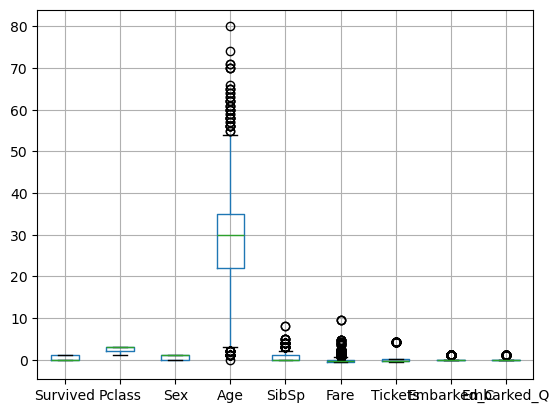

In [32]:
df.boxplot()
plt.show()

In [33]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

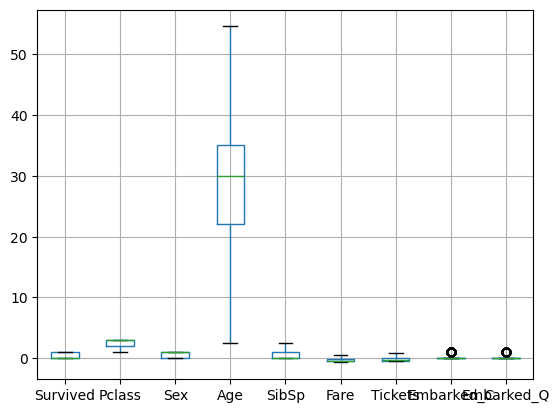

In [34]:
df.boxplot()
plt.show()

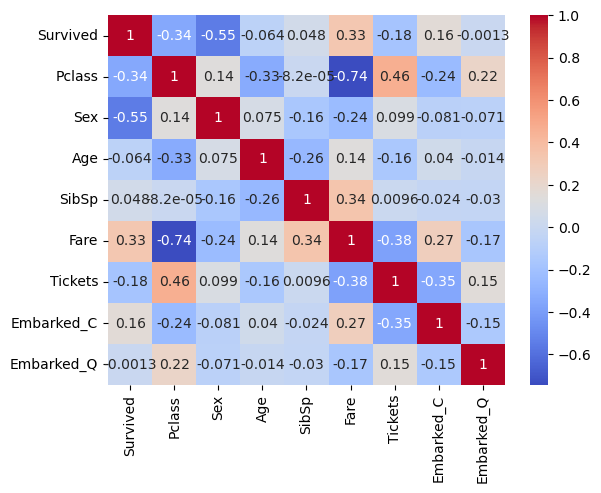

In [35]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Fare          0
Tickets       4
Embarked_C    0
Embarked_Q    0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    876 non-null    int64  
 1   Pclass      876 non-null    int64  
 2   Sex         876 non-null    int64  
 3   Age         876 non-null    float64
 4   SibSp       876 non-null    float64
 5   Fare        876 non-null    float64
 6   Tickets     872 non-null    float64
 7   Embarked_C  876 non-null    bool   
 8   Embarked_Q  876 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 49.7 KB


In [38]:
print(df.corr().columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Tickets',
       'Embarked_C', 'Embarked_Q'],
      dtype='object')


In [39]:
model=LGBMClassifier(class_weight='balanced',force_col_wise=True,min_gain_to_split=0.0,min_data_in_leaf=1)

In [40]:
target = df[['Survived']]
futhure = df.drop('Survived',axis=1)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(futhure,target,train_size=0.75,random_state=150)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(657, 8)
(219, 8)
(657, 1)
(219, 1)


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
model.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0
[LightGBM] [Info] Number of positive: 251, number of negative: 406
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 657, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', force_col_wise=True, min_data_in_leaf=1,
               min_gain_to_split=0.0)

In [44]:
from sklearn.metrics import accuracy_score

In [56]:
y_pre=model.predict(x_test)
lgbm_acc=accuracy_score(y_test,y_pre)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0.0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0


In [53]:
model2=XGBClassifier(n_estimators= 200,
    max_depth=5,
    learning_rate= 0.01,
    subsample= 0.8,
    colsample_bytree=0.8)

In [54]:
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred=model2.predict(x_test)
xgb_acc=accuracy_score(y_test,y_pred)

In [49]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(model2,param_grid,cv=5,scoring='accuracy')

In [52]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.01],
                         'max_depth': [3, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8]},
             scoring='accuracy')

In [58]:
print('Accuracy of LGBM :',lgbm_acc)
print('Accuracy of XGBM :',xgb_acc)

Accuracy of LGBM : 0.7990867579908676
Accuracy of XGBM : 0.8584474885844748


In [7]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, -1] 
}


In [ ]:
lgb = LGBMClassifier(random_state=42)


grid = GridSearchCV(lgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


best_lgb = grid.best_estimator_